In [104]:
import pandas as pd
import numpy as np

##### Parsing the dates while reading the file.

##### The file downloaded from Kaggle is corrupt for trump tweets. Hence, I have saved it as an xlsx file. All files in the project can be found at the below link address.

###### https://uillinoisedu-my.sharepoint.com/:f:/g/personal/sbhing2_illinois_edu/EukRb0QIw5pFlqVJwlHkY-YBng0lsrZharURl2w8aagyeQ?e=KtYiTH


In [79]:
data_trump = pd.read_excel('hashtag_donaldtrump.xlsx', parse_dates=['created_at'])

In [132]:
sampled_trump = data_trump
sampled_trump

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1316529221557250048.0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0,0.0,TweetDeck,360666534,El Sol Latino News,elsollatinonews,ðŸŒ Noticias de interÃ©s para latinos de la c...,...,1860,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00.000
2,2020-10-15 00:00:02,1316529228091840000.0,"#Trump: As a student I used to hear for years,...",2,1.0,Twitter Web App,8436472,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746
4,2020-10-15 00:00:08,1316529252301449984.0,You get a tie! And you get a tie! #Trump â€˜s ...,4,3.0,Twitter for iPhone,47413798,Rana Abtar - Ø±Ù†Ø§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.493
5,2020-10-15 00:00:17,1316529291052669952.0,@CLady62 Her 15 minutes were over long time ag...,2,0.0,Twitter for Android,1138416104,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisFo...,...,2363,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,2020-10-21 00:00:01.866
7,2020-10-15 00:00:18,1316529293497959936.0,@DeeviousDenise @realDonaldTrump @nypost There...,0,0.0,Twitter for iPhone,900761071631428992.0,Stacey Gulledge ðŸ‡ºðŸ‡¸ Patriot â™¥ï¸ KAG ðŸ...,sm_gulledge,"Patriot, Wife, â€œShaken not Stirredâ€ Mom of...",...,766,"Ohio, USA",40.225357,-82.68814,NaN,United States of America,North America,Ohio,OH,2020-10-21 00:00:02.613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971145,2020-11-08 23:59:25,1325588768448000000.0,"Donald Trump, Moscow, 1996, shared by @oooroma...",8,3.0,Twitter Web App,388137441,Elisabeth SchimpfÃ¶ssl,ElisabethSchimp,Author of Rich Russians,...,586,"London, England",51.507322,-0.127647,London,United Kingdom,Europe,England,ENG,2020-11-09 17:47:55.816
971147,2020-11-08 23:59:34,1325588806679079936.0,@elnuevoherald LOS MEDIOS A LA FUERZA QUIEREN ...,0,0.0,Twitter Web App,1263450676228770048.0,RAÃšL,BSC_ROCK1,"""El #Correavirus es peor que el #Coronavirus""",...,61,Ecuador,-1.339767,-79.366697,NaN,Ecuador,South America,NaN,NaN,2020-11-09 17:47:55.857
971148,2020-11-08 23:59:36,1325588813406670080.0,13 emails from #Trump and Trumpettes today. 20...,1,0.0,Twitter for iPhone,357849201,murdoch davis,murdochdavis,"I try to be pithy, not pissy. Like you I fail....",...,1190,Valparaiso IN Team @mlh_holmes,-33.045846,-71.619675,ValparaÃ­so,Chile,South America,Valparaiso Region,NaN,2020-11-09 17:47:56.022
971149,2020-11-08 23:59:37,1325588820495010048.0,"unlike MUSSOLINI, HITLER, MAO, LENIN &amp; STA...",0,0.0,Twitter Web App,313536147,ActivistBowen,ActivistBowen2,"person, web writer, dissident, son, brother, f...",...,3792,Hong Kong,22.279328,114.162813,Hong Kong Island,China,Asia,Hong Kong,NaN,2020-11-09 17:47:56.080


In [137]:
options=['United States of America']
s = sampled_trump[sampled_trump['country'].isin(options)]
s['state'].unique()

array(['Florida', 'Oregon', 'District of Columbia', 'California', 'Ohio',
       'Pennsylvania', 'Illinois', 'Michigan', 'New Jersey',
       'Massachusetts', 'New Hampshire', 'Texas', 'South Dakota',
       'Georgia', 'Missouri', 'New York', 'Colorado', 'South Carolina',
       'Virginia', 'Alabama', 'Arizona', 'North Carolina', 'Tennessee',
       'Nebraska', 'Louisiana', 'Nevada', 'Minnesota', 'Indiana',
       'Washington', 'Hawaii', 'West Virginia', 'Vermont', 'Idaho',
       'Puerto Rico', 'Iowa', 'Kentucky', 'North Dakota', 'Arkansas',
       'Wisconsin', 'Utah', 'Montana', 'Kansas', 'Wyoming', 'Maine',
       'Connecticut', 'Maryland', 'New Mexico', 'Oklahoma', 'Alaska',
       'Delaware', 'Rhode Island', 'Mississippi', nan, 'Guam'],
      dtype=object)

In [110]:
sampled_trump.dropna(subset=['country'],inplace=True)

In [111]:
trump_date_fltr = sampled_trump.loc[(sampled_trump['created_at'] <= '2020-11-05')]

In [112]:
trump_tweets = trump_date_fltr[['tweet','state']]

In [113]:
options = ['Pennsylvania']
pennsylvania_tweets_trump = trump_tweets[trump_tweets['state'].isin(options)]

In [114]:
pennsylvania_tweets_trump

,tweet,state
8,One of the single most effective remedies to e...,Pennsylvania
62,#DonaldTrump #TheInfected @POTUS is a doofus w...,Pennsylvania
171,@MeidasTouch He can not even wing it. #Trump i...,Pennsylvania
199,These people that @Acosta is interviewing at a...,Pennsylvania
319,Another #Murdoch hack job - just like @FoxNews...,Pennsylvania
...,...,...
653615,#Vote2020 #trump #biden #Philly #VoteResponsi...,Pennsylvania
653646,#ElectionsResults2020 #electionresults #giulia...,Pennsylvania
653741,"#DonaldTrump..Face it, you lost. Grow up and j...",Pennsylvania
653767,"DONALD TRUMP'S BEEN CHEATING HIS WHOLE LIFE, H...",Pennsylvania


#### Separating tweets which have the words Trump in them. Will optimise further removing or conditions

In [115]:
pennsylvania_tweets_trump.loc[pennsylvania_tweets_trump['tweet'].str.contains('Trump' or 'trump' or 'Republican') , 'Groups'] = 1

C:\Users\Sarthak\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Sarthak\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [116]:
pennsylvania_tweets_trump

,tweet,state,Groups
8,One of the single most effective remedies to e...,Pennsylvania,1.0
62,#DonaldTrump #TheInfected @POTUS is a doofus w...,Pennsylvania,1.0
171,@MeidasTouch He can not even wing it. #Trump i...,Pennsylvania,1.0
199,These people that @Acosta is interviewing at a...,Pennsylvania,1.0
319,Another #Murdoch hack job - just like @FoxNews...,Pennsylvania,NaN
...,...,...,...
653615,#Vote2020 #trump #biden #Philly #VoteResponsi...,Pennsylvania,NaN
653646,#ElectionsResults2020 #electionresults #giulia...,Pennsylvania,NaN
653741,"#DonaldTrump..Face it, you lost. Grow up and j...",Pennsylvania,1.0
653767,"DONALD TRUMP'S BEEN CHEATING HIS WHOLE LIFE, H...",Pennsylvania,NaN


In [117]:
pennsylvania_tweets_trump['Groups'].value_counts()

1.0    4678
Name: Groups, dtype: int64

In [118]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Sarthak\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [119]:
pennsylvania_tweets_trump['scores'] = pennsylvania_tweets_trump['tweet'].apply(lambda review: sid.polarity_scores(review))

C:\Users\Sarthak\AppData\Local\Temp/ipykernel_22668/639805085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pennsylvania_tweets_trump['scores'] = pennsylvania_tweets_trump['tweet'].apply(lambda review: sid.polarity_scores(review))


In [120]:
pennsylvania_tweets_trump

,tweet,state,Groups,scores
8,One of the single most effective remedies to e...,Pennsylvania,1.0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp..."
62,#DonaldTrump #TheInfected @POTUS is a doofus w...,Pennsylvania,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
171,@MeidasTouch He can not even wing it. #Trump i...,Pennsylvania,1.0,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou..."
199,These people that @Acosta is interviewing at a...,Pennsylvania,1.0,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp..."
319,Another #Murdoch hack job - just like @FoxNews...,Pennsylvania,NaN,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp..."
...,...,...,...,...
653615,#Vote2020 #trump #biden #Philly #VoteResponsi...,Pennsylvania,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
653646,#ElectionsResults2020 #electionresults #giulia...,Pennsylvania,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
653741,"#DonaldTrump..Face it, you lost. Grow up and j...",Pennsylvania,1.0,"{'neg': 0.329, 'neu': 0.564, 'pos': 0.106, 'co..."
653767,"DONALD TRUMP'S BEEN CHEATING HIS WHOLE LIFE, H...",Pennsylvania,NaN,"{'neg': 0.23, 'neu': 0.656, 'pos': 0.114, 'com..."


In [121]:
pennsylvania_tweets_trump['compound']  = pennsylvania_tweets_trump['scores'].apply(lambda score_dict: score_dict['compound'])

C:\Users\Sarthak\AppData\Local\Temp/ipykernel_22668/2180982612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pennsylvania_tweets_trump['compound']  = pennsylvania_tweets_trump['scores'].apply(lambda score_dict: score_dict['compound'])


In [122]:
pennsylvania_tweets_trump

,tweet,state,Groups,scores,compound
8,One of the single most effective remedies to e...,Pennsylvania,1.0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.5256
62,#DonaldTrump #TheInfected @POTUS is a doofus w...,Pennsylvania,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
171,@MeidasTouch He can not even wing it. #Trump i...,Pennsylvania,1.0,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou...",-0.8748
199,These people that @Acosta is interviewing at a...,Pennsylvania,1.0,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...",-0.7599
319,Another #Murdoch hack job - just like @FoxNews...,Pennsylvania,NaN,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",0.8126
...,...,...,...,...,...
653615,#Vote2020 #trump #biden #Philly #VoteResponsi...,Pennsylvania,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
653646,#ElectionsResults2020 #electionresults #giulia...,Pennsylvania,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
653741,"#DonaldTrump..Face it, you lost. Grow up and j...",Pennsylvania,1.0,"{'neg': 0.329, 'neu': 0.564, 'pos': 0.106, 'co...",-0.7729
653767,"DONALD TRUMP'S BEEN CHEATING HIS WHOLE LIFE, H...",Pennsylvania,NaN,"{'neg': 0.23, 'neu': 0.656, 'pos': 0.114, 'com...",-0.5403


In [123]:
pennsylvania_tweets_trump['compound'].value_counts()

 0.0000    1454
 0.4939     228
-0.2340      86
 0.5667      85
 0.2244      73
           ... 
 0.7536       1
 0.4592       1
-0.5796       1
-0.5684       1
-0.5403       1
Name: compound, Length: 1453, dtype: int64

In [125]:
pennsylvania_tweets_trump.loc[pennsylvania_tweets_trump['compound'] > 0 , 'category'] = 1
pennsylvania_tweets_trump.loc[pennsylvania_tweets_trump['compound'] < 0 , 'category'] = 0


In [126]:
pennsylvania_tweets_trump

,tweet,state,Groups,scores,compound,category
8,One of the single most effective remedies to e...,Pennsylvania,1.0,"{'neg': 0.0, 'neu': 0.834, 'pos': 0.166, 'comp...",0.5256,1.0
62,#DonaldTrump #TheInfected @POTUS is a doofus w...,Pennsylvania,1.0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
171,@MeidasTouch He can not even wing it. #Trump i...,Pennsylvania,1.0,"{'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou...",-0.8748,0.0
199,These people that @Acosta is interviewing at a...,Pennsylvania,1.0,"{'neg': 0.124, 'neu': 0.876, 'pos': 0.0, 'comp...",-0.7599,0.0
319,Another #Murdoch hack job - just like @FoxNews...,Pennsylvania,NaN,"{'neg': 0.0, 'neu': 0.543, 'pos': 0.457, 'comp...",0.8126,1.0
...,...,...,...,...,...,...
653615,#Vote2020 #trump #biden #Philly #VoteResponsi...,Pennsylvania,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
653646,#ElectionsResults2020 #electionresults #giulia...,Pennsylvania,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
653741,"#DonaldTrump..Face it, you lost. Grow up and j...",Pennsylvania,1.0,"{'neg': 0.329, 'neu': 0.564, 'pos': 0.106, 'co...",-0.7729,0.0
653767,"DONALD TRUMP'S BEEN CHEATING HIS WHOLE LIFE, H...",Pennsylvania,NaN,"{'neg': 0.23, 'neu': 0.656, 'pos': 0.114, 'com...",-0.5403,0.0


In [127]:
pennsylvania_tweets_trump['category'].value_counts()

1.0    2056
0.0    1978
Name: category, dtype: int64

array([[<AxesSubplot:title={'center':'compound'}>]], dtype=object)

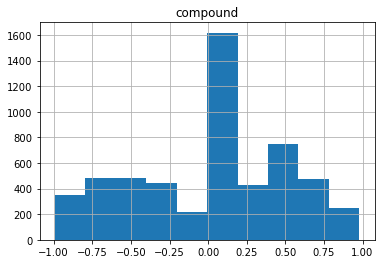

In [128]:
pennsylvania_tweets_trump.hist(column='compound',bins=10)

In [150]:
def sentimentAnalysis(trump_tweets : pd.DataFrame ,options : list):
    state_trump_tweets = trump_tweets
    state_trump_tweets = trump_tweets[trump_tweets['state'].isin([i])]
    state_trump_tweets['scores'] = state_trump_tweets['tweet'].apply(lambda review: sid.polarity_scores(review))
    state_trump_tweets['compound']  = state_trump_tweets['scores'].apply(lambda score_dict: score_dict['compound'])
    state_trump_tweets.loc[state_trump_tweets['compound'] > 0 , 'category'] = 1
    return_tweet = state_trump_tweets.loc[state_trump_tweets['compound'] < 0 , 'category'] = 0
    return return_tweet
    

In [151]:
options=['Florida', 'Oregon', 'District of Columbia', 'California', 'Ohio',
       'Pennsylvania', 'Illinois', 'Michigan', 'New Jersey',
       'Massachusetts', 'New Hampshire', 'Texas', 'South Dakota',
       'Georgia', 'Missouri', 'New York', 'Colorado', 'South Carolina',
       'Virginia', 'Alabama', 'Arizona', 'North Carolina', 'Tennessee',
       'Nebraska', 'Louisiana', 'Nevada', 'Minnesota', 'Indiana',
       'Washington', 'Hawaii', 'West Virginia', 'Vermont', 'Idaho',
       'Puerto Rico', 'Iowa', 'Kentucky', 'North Dakota', 'Arkansas',
       'Wisconsin', 'Utah', 'Montana', 'Kansas', 'Wyoming', 'Maine',
       'Connecticut', 'Maryland', 'New Mexico', 'Oklahoma', 'Alaska',
       'Delaware', 'Rhode Island', 'Mississippi','Guam']
trump_tweets
for i in options:
    globals()[f"{i}_trump_tweets"]=sentimentAnalysis(trump_tweets,options)

C:\Users\Sarthak\AppData\Local\Temp/ipykernel_22668/2747656767.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_trump_tweets['scores'] = state_trump_tweets['tweet'].apply(lambda review: sid.polarity_scores(review))
C:\Users\Sarthak\AppData\Local\Temp/ipykernel_22668/2747656767.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_trump_tweets['compound']  = state_trump_tweets['scores'].apply(lambda score_dict: score_dict['compound'])


In [153]:
Illinois_tweets_trump

,tweet,state,scores,compound,category
11,"In 2020, #NYPost is being #censorship #CENSORE...",Illinois,"{'neg': 0.103, 'neu': 0.811, 'pos': 0.086, 'co...",-0.4137,0.0
29,@karatblood @KazePlays_JC Grab @realDonaldTrum...,Illinois,"{'neg': 0.157, 'neu': 0.787, 'pos': 0.057, 'co...",-0.6229,0.0
36,Who does #trump owe 420 million dollars to? Wh...,Illinois,"{'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'comp...",-0.4705,0.0
57,@glennkirschner2 So basically the American exp...,Illinois,"{'neg': 0.08, 'neu': 0.852, 'pos': 0.068, 'com...",-0.1421,0.0
78,â€œWe have heard the Election called at midnig...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
...,...,...,...,...,...
652319,#trump Can't Do Too..Much Moving Around After ...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
652648,We should get rid of polling places and instea...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
653085,#STOPTHEBAOTCOUNT WHERE I'M BEHIND &amp;\n#STO...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
653206,#Trump and polarization drove record turnout. ...,Illinois,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NaN
